<a href="https://colab.research.google.com/github/Tim-R413/Cover-Crop-Classification/blob/master/Cover_Crop_Classifier_Model_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preperation:

In [0]:
%cd /content
!git clone https://github.com/Tim-R413/Cover-Crop-Classification.git
%cd /content/Cover-Crop-Classification/

/content
fatal: destination path 'Cover-Crop-Classification' already exists and is not an empty directory.
/content/Cover-Crop-Classification


In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:

pic_path = '/content/gdrive/My Drive/Cover Crop species data /NEW TEST DATA/305-triticale-3.jpg'


# Cover Crop Classifier  - Test C.C.T model








This is a Google Colab notebook containing the code to import a neural network model and evaluate its test accuracy on new data

*   **Insert the image file path below:**
*   **import the desired models**
*  **Run program to view predctions of 3 classifier models** 





# Configuration:

### library imports:


In [0]:
# Tensorflow and tf.Keras APIs 
import tensorflow as tf 
from tensorflow import keras
print(tf.__version__)

1.14.0


In [0]:
# Supplementing/ helper Libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import glob, os 
import re 
import math

# Python Image Library 
import PIL 
from PIL import Image

import statistics 
from statistics import mode 

### Define Functions:

In [0]:

# define a function that crops each full image into 9 seperate size equivalent images  
def image_division (file_path, photo_size):
  full_img = Image.open (file_path) #.convert('L')
  
   # Make aspect ratio as 1:1, by applying image crop. this converts the images into sqaures
  Width, Height = full_img.size
  if Width != Height:
                m_min_d = min(Width, Height)
                full_img = full_img.crop((0, 0, m_min_d, m_min_d))
  
  # Splits the square image into 5 individual images, each cropped to 1/9 the size of the original image 
  DF = m_min_d
  DM = math.floor(DF / 4  )
  A = full_img.crop((0, 0, DM, DM))
  B = full_img.crop((DM,0,2*DM,DM))
  C = full_img.crop((2*DM,0,3*DM,DM))
  D = full_img.crop((3*DM,0,DF,DM))

  E = full_img.crop((0,DM,DM,2*DM))
  F = full_img.crop((DM,DM,2*DM,2*DM))
  G = full_img.crop((2*DM,DM,3*DM,2*DM))
  H = full_img.crop((3*DM,DM,DF,2*DM))

  I = full_img.crop((0,2*DM,DM,3*DM))
  J = full_img.crop((DM,2*DM,2*DM,3*DM))
  K = full_img.crop((2*DM,2*DM,3*DM,3*DM))
  L = full_img.crop((3*DM,2*DM,DF,3*DM))

  M = full_img.crop((0,3*DM,DM,DF))
  N = full_img.crop((DM,3*DM,2*DM,DF))
  O = full_img.crop((2*DM,3*DM,3*DM,DF))
  P = full_img.crop((3*DM,3*DM,DF,DF))


  
  
   # Scale the image to the requested max photo size by Anti-alias sampling.
  A.thumbnail(photo_size, PIL.Image.ANTIALIAS)
  B.thumbnail(photo_size, PIL.Image.ANTIALIAS)
  C.thumbnail(photo_size, PIL.Image.ANTIALIAS)
  D.thumbnail(photo_size, PIL.Image.ANTIALIAS)

  E.thumbnail(photo_size, PIL.Image.ANTIALIAS)
  F.thumbnail(photo_size, PIL.Image.ANTIALIAS)
  G.thumbnail(photo_size, PIL.Image.ANTIALIAS)
  H.thumbnail(photo_size, PIL.Image.ANTIALIAS)

  I.thumbnail(photo_size, PIL.Image.ANTIALIAS)
  J.thumbnail(photo_size, PIL.Image.ANTIALIAS)
  K.thumbnail(photo_size, PIL.Image.ANTIALIAS)
  L.thumbnail(photo_size, PIL.Image.ANTIALIAS)

  M.thumbnail(photo_size, PIL.Image.ANTIALIAS)
  N.thumbnail(photo_size, PIL.Image.ANTIALIAS)
  O.thumbnail(photo_size, PIL.Image.ANTIALIAS)
  P.thumbnail(photo_size, PIL.Image.ANTIALIAS)


  
  # returns each individual image as its own Numpy array
  return np.asarray(A), np.asarray(B), np.asarray(C), np.asarray(D), np.asarray(E), np.asarray(F), np.asarray(G), np.asarray(H), np.asarray(I), np.asarray(J), np.asarray(K), np.asarray(L), np.asarray(M), np.asarray(N), np.asarray(O), np.asarray(P)
  

In [0]:
## Define a function that loads a single image into a coppped dataset to test model accuracy : 
def load_image_data (dir_path, photo_size):
  images = []
  file = dir_path
  
      # analyzes each image file in the designated folder and uses the image_division function to extract 5 seperate images from that larger image
 
    
  img_A, img_B, img_C, img_D, img_E, img_F, img_G, img_H, img_I, img_J, img_K, img_L, img_M, img_N, img_O, img_P= image_division (file, photo_size)
  img_set = [img_A, img_B, img_C, img_D, img_E, img_F, img_G, img_H, img_I, img_J, img_K, img_L, img_M, img_N, img_O, img_P]
  how_many = len(img_set)
  
  for i in range (0,how_many):
          images.append(img_set[i])
      
        # appends each mini image to the 'images' dataset and appends its respecting index classification label to the 'label' dataset
        # images and labels are appended together so the index is kept consistent between the two datasets.  
 
  return (np.asarray(images))

In [0]:


def species_list(predictions_array , answers ):
  print("Prediction:       Actual:")
  picture=0
  for picture in range (0,len (predictions_array)):
    img_guess_num = np.argmax (predictions_array[picture]) 
    img_guess_name = CATEGORIES[img_guess_num]
    print(img_guess_name,"       ", answers)
    picture +1

def species_guess(predictions_array):
  results= []
  img_guess_num = np.argmax(predictions_array)
  picture = 0
  for picture in range (0,len(predictions_array)):
    img_guess_num = np.argmax(predictions_array[picture])
    results.append(img_guess_num)
    picture + 1
  final_guess = mode(results)
 # if final_guess 
  return CATEGORIES[final_guess]
  
  

In [0]:
def disp_full_img (path):
  full_img = Image.open (path)
  img_arr=np.asarray(full_img)
  plt.figure(figsize=(10,10))
  grid_size = 25

  #plt.subplot(5, 5)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img_arr, cmap=plt.cm.binary)
  #plt.xlabel(CATEGORIES[labels[i]])
  
  
  
  
  
def plot_image(i, predictions_array, img):
  predictions_array, img = predictions_array[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  plt.xlabel("{} {:2.0f}%  ".format(CATEGORIES[predicted_label],
                                100*np.max(predictions_array),
                                color='b'))

### loading model(s):

In [0]:
%cd /
from keras.models import load_model
MarkI_model = tf.keras.models.load_model(
    'content/gdrive/My Drive/MarkI_model',
    custom_objects=None,
    compile=True
)

/


In [0]:
MarkII_model = tf.keras.models.load_model(
    'content/gdrive/My Drive/MarkII_model',
    custom_objects=None,
    compile=True
)

In [0]:
MarkIV_CNN_model = tf.keras.models.load_model(
    'content/gdrive/My Drive/MarkIV_CNN_model',
    custom_objects=None,
    compile=True
)

## Conduct model predictions on images:

###  **Load** image data into image Classifier:

In [0]:
photo_size = (16, 16)
CATEGORIES = ['Canola', 'Clover', 'Triticale']

In [0]:
%cd /

(test_images) = load_image_data(pic_path,photo_size)
(present_test_images) = load_image_data(pic_path,(175,175))
test_images = test_images/255.0

/


In [0]:
predictions_A= MarkI_model.predict(test_images)
predictions_B= MarkII_model.predict(test_images)
predictions_C= MarkIV_CNN_model.predict(test_images)

#Results:

## Display predictions and final species guess along with  display image results :

1.   Model 1 is the MarkI_model with CCT only classification
2.   Model 2 is the MarkII_Model with CCT only classification
3.   Model 3 is the MarkIV_CNN_model with CCt only classification



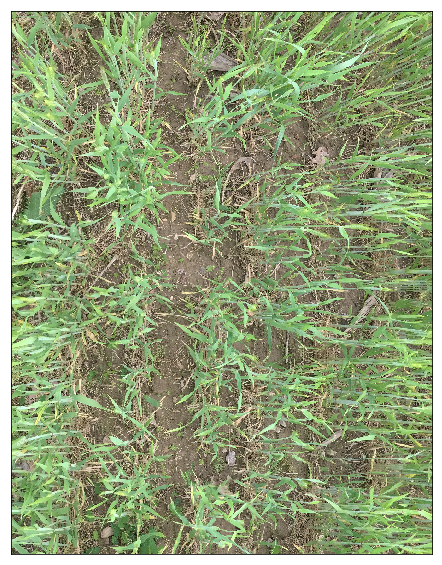

The Cover Crop species in this image is:  Triticale (Model 1 Prediction)
The Cover Crop species in this image is:  Canola (Model 2 Prediction)
The Cover Crop species in this image is:  Triticale (Model 3 Prediction)


In [0]:
guessA=species_guess(predictions_A)
guessB=species_guess(predictions_B)
guessC=species_guess(predictions_C)
 


disp_full_img(pic_path)
plt.show()
print ("The Cover Crop species in this image is: ",guessA, "(Model 1 Prediction)")
print ("The Cover Crop species in this image is: ",guessB, "(Model 2 Prediction)")
print ("The Cover Crop species in this image is: ",guessC, "(Model 3 Prediction)")

###Model Prediction Result Details:

                       MODEL 1 PREDICTIONS: 


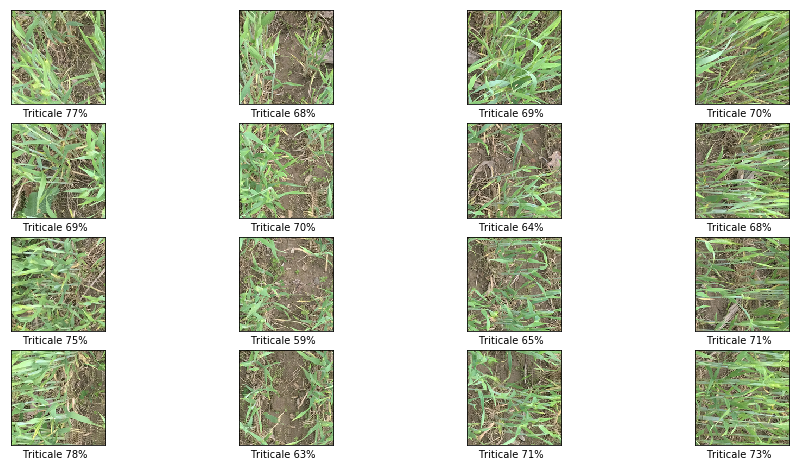

                       MODEL 2 PREDICTIONS: 


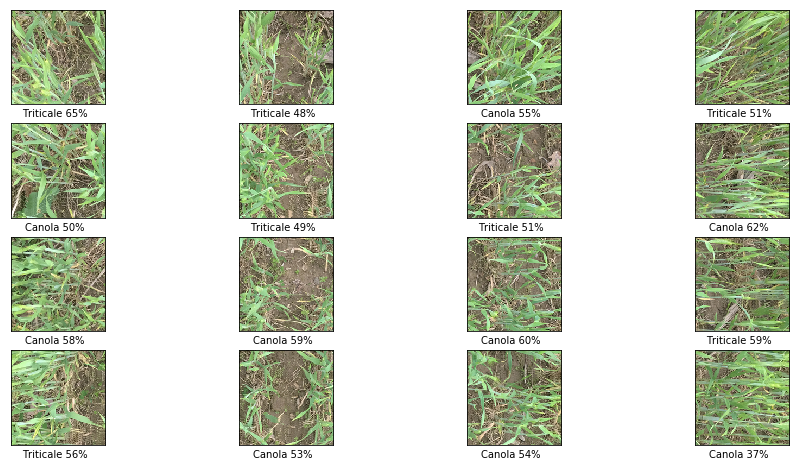

                       MODEL 3 PREDICTIONS: 


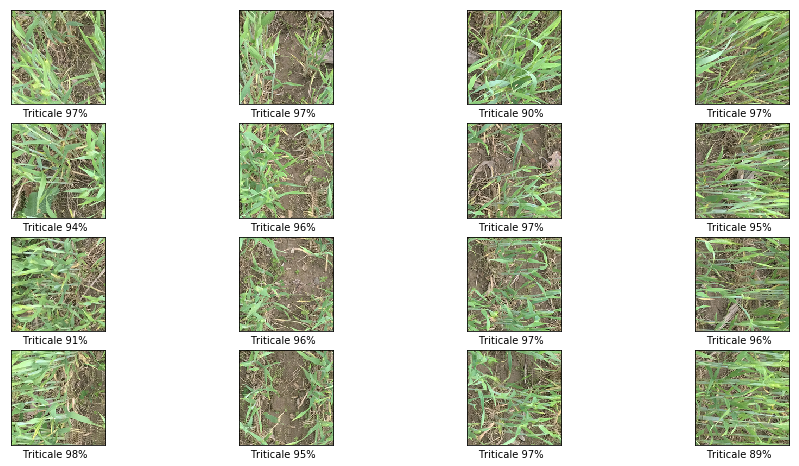

In [0]:
print ("                       MODEL 1 PREDICTIONS: ")
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_A, present_test_images)
plt.show()

print ("                       MODEL 2 PREDICTIONS: ")
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_B, present_test_images)
plt.show()

print ("                       MODEL 3 PREDICTIONS: ")
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_C, present_test_images)
plt.show()